# Test Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype


import warnings
warnings.filterwarnings('ignore')

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from scipy import stats
from scipy.stats import norm, skew 

In [2]:
test = pd.read_csv('C:/Users/harsha/Desktop/python/Data/test.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(test.shape)

(1459, 80)


In [6]:
test.drop(['Id'], axis=1, inplace=True)
test.reset_index(drop=True, inplace=True)

In [7]:
test.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
# checking % of missing Value in each feature in test data 

# 1 - List of features which has missing values

null_column = [features for features in test.columns if test[features].isnull().sum()>1]

#2 - print feature and percentage of missing value

for feature in null_column:
    print(feature, np.round(test[feature].isnull().mean(), 3), '%missing values')


MSZoning 0.003 %missing values
LotFrontage 0.156 %missing values
Alley 0.927 %missing values
Utilities 0.001 %missing values
MasVnrType 0.011 %missing values
MasVnrArea 0.01 %missing values
BsmtQual 0.03 %missing values
BsmtCond 0.031 %missing values
BsmtExposure 0.03 %missing values
BsmtFinType1 0.029 %missing values
BsmtFinType2 0.029 %missing values
BsmtFullBath 0.001 %missing values
BsmtHalfBath 0.001 %missing values
Functional 0.001 %missing values
FireplaceQu 0.5 %missing values
GarageType 0.052 %missing values
GarageYrBlt 0.053 %missing values
GarageFinish 0.053 %missing values
GarageQual 0.053 %missing values
GarageCond 0.053 %missing values
PoolQC 0.998 %missing values
Fence 0.801 %missing values
MiscFeature 0.965 %missing values


there are many missing values in many column , before treating it need to find the relationship with target variables in train dataset

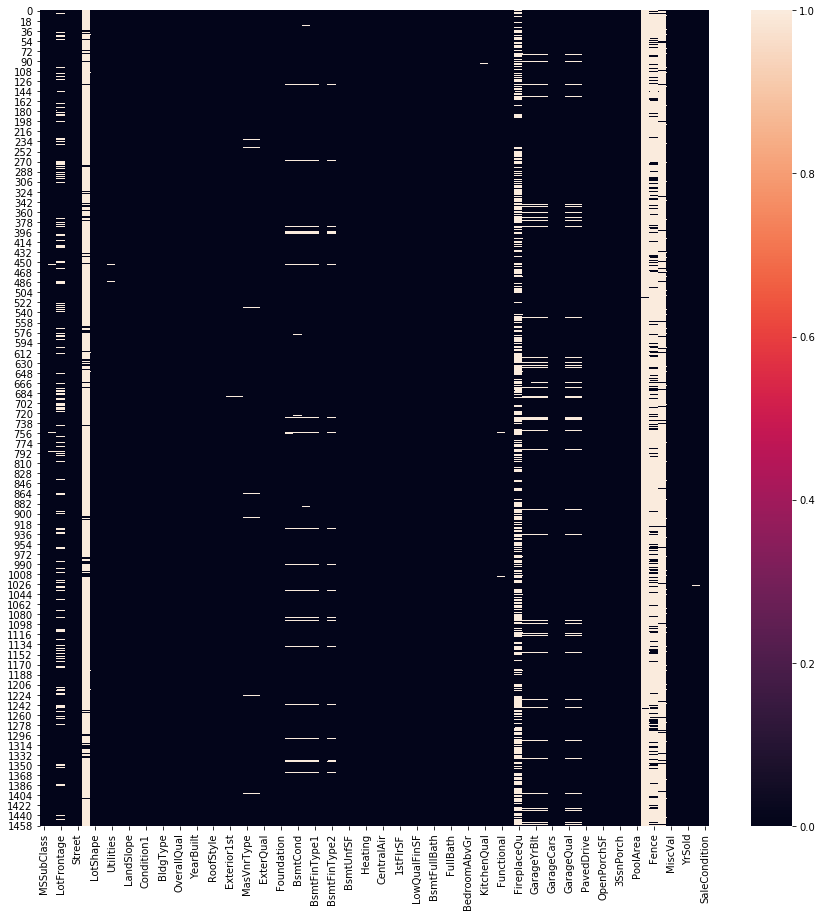

In [9]:
# to see missing value , we plot figure

plt.figure(figsize = (15,15))
sns.heatmap(test.isnull())



    we can see there are lot of missing values in many columns (white dashes represent missing values)

# Numerical variables

In [13]:
# List of numerical Variables 

numerical_features = [feature for feature in test.columns if test[feature].dtypes != "O"]

print('number of numerical variables:', len(numerical_features))

number of numerical variables: 36


In [15]:
test[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


# Temporal Variables (Datatime)

In [16]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

# Types of Numerical features

In [17]:
# numerical Variables are two types 

#1. continuous variables
# 2. discrete variables 


discrete_feature = [feature for feature in numerical_features if len(test[feature].unique())< 30 and feature not in year_feature+ ['ID']]
print("discrete variables count: {}".format(len(discrete_feature)))

discrete variables count: 17


In [18]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

# continuous variables 

In [19]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+ ['ID']]
print("continuous variables count: {}".format(len(continuous_feature)))

continuous variables count: 15


In [20]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

# Histogram

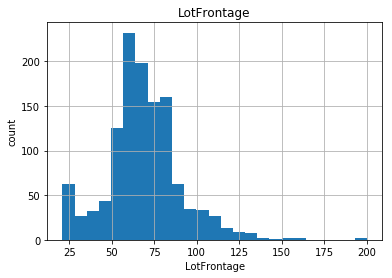

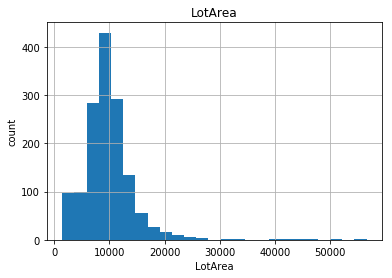

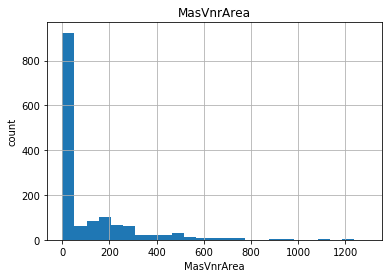

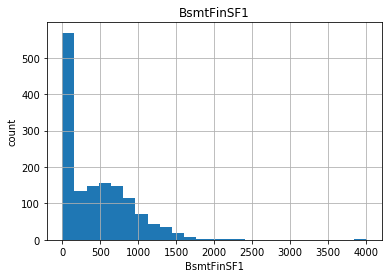

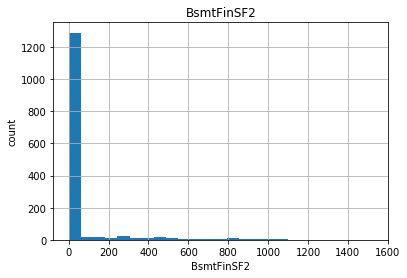

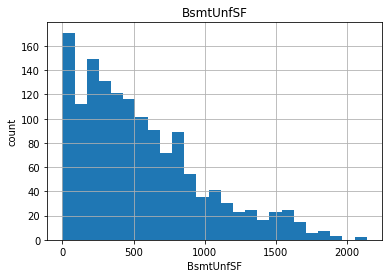

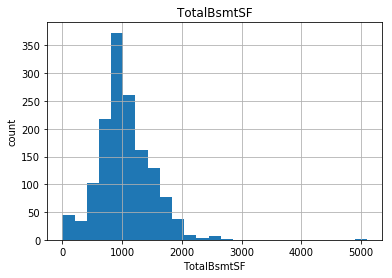

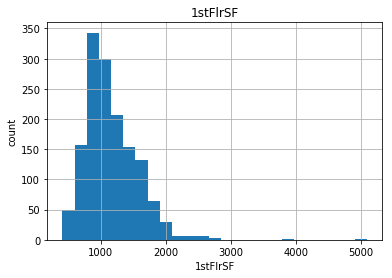

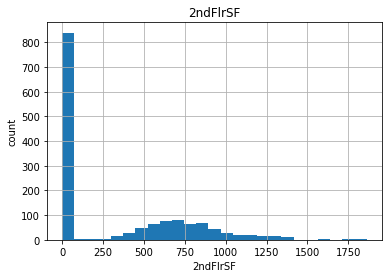

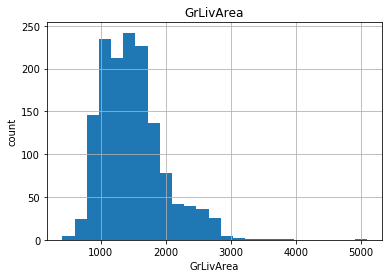

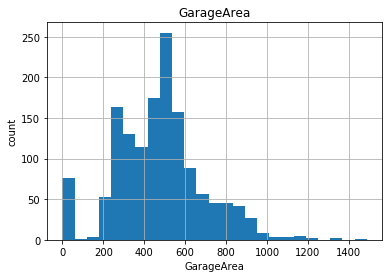

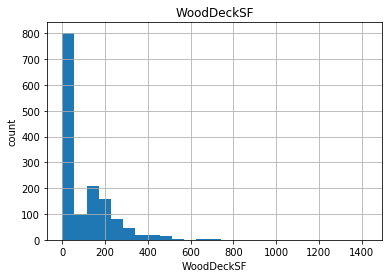

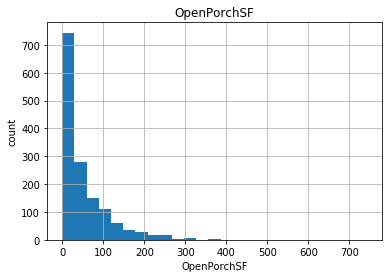

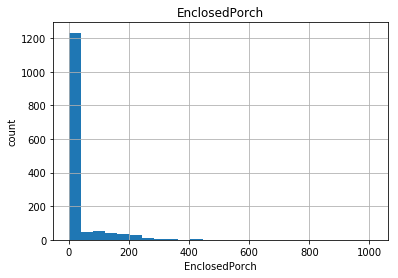

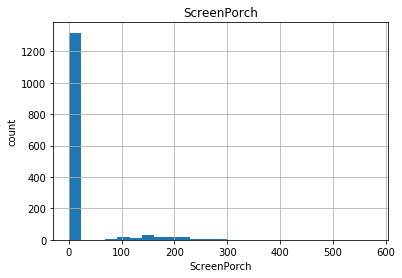

In [21]:
# lets check gussian distribution by creating histogram of continuous variables

for feature in continuous_feature:
 
    test[feature].hist(bins= 25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()


as we see many features are highly skewed in nature hence require to perform log transformation

# checking for outliers

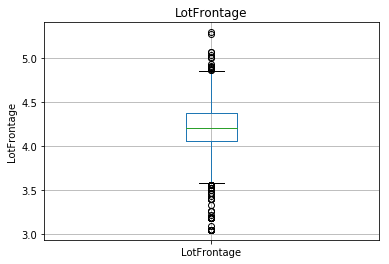

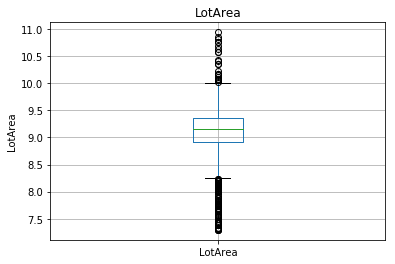

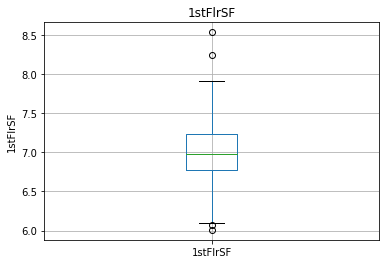

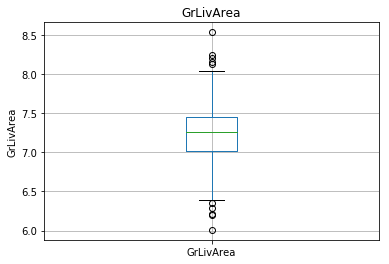

In [22]:
for feature in continuous_feature:
    
    if 0 in test[feature].unique():
        pass
    else:
        test[feature]=np.log(test[feature])
        test.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

we treat this outlier by taking log transformation

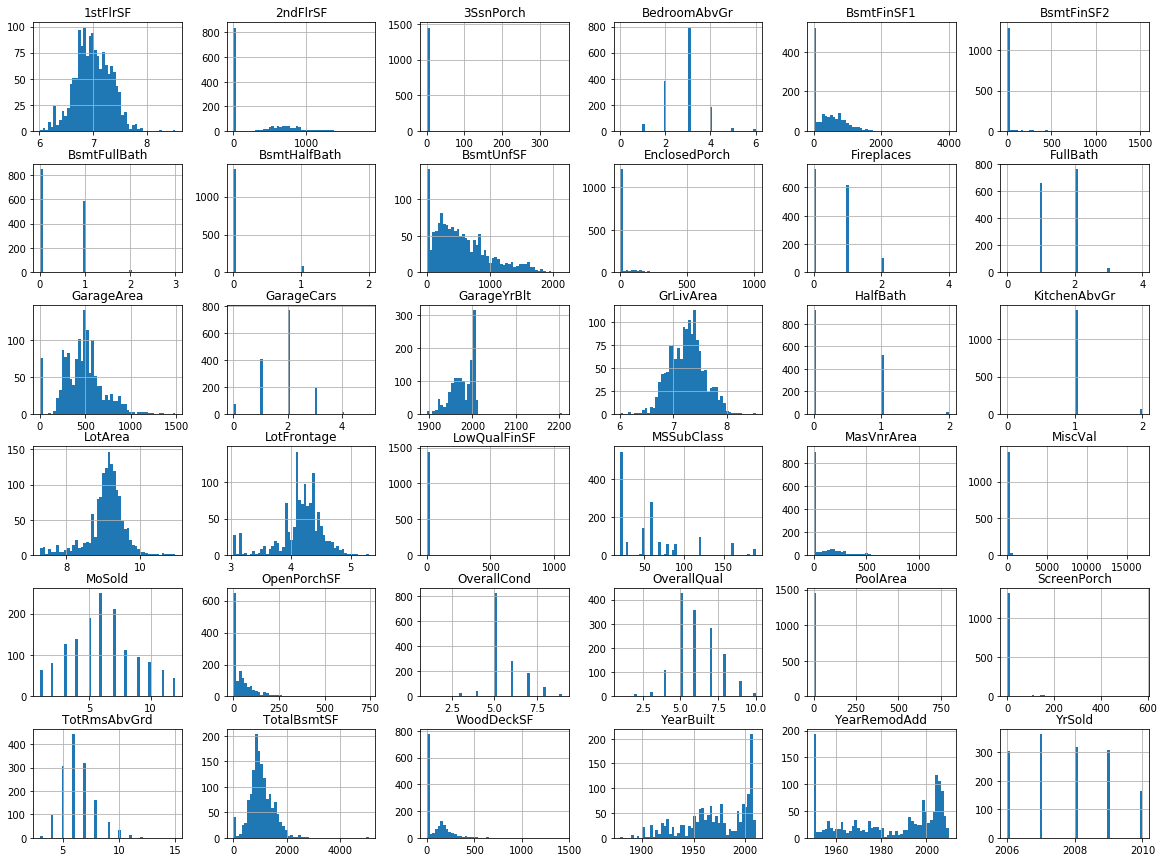

In [23]:
test.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
dataset = test.copy()

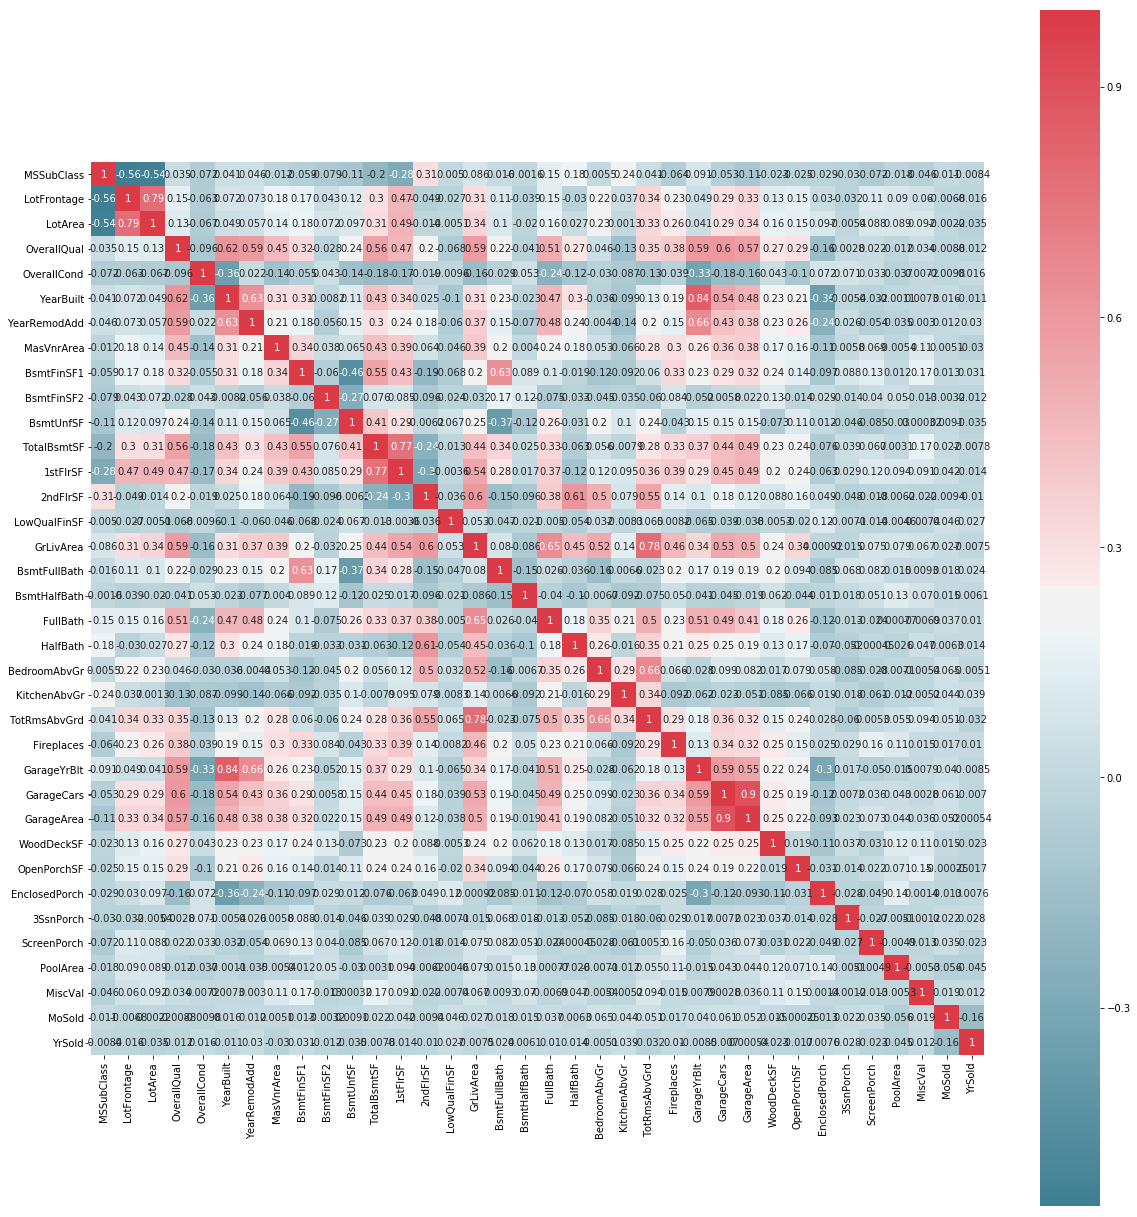

In [25]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 22))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

1. we can see GarageArea and GarageCars are highly correlated
2. LotFrontage and LotArea has good correlation
3. YearBuilt and GarageBuilt has correlation
4. YearBuilt and YearremodAdd has good correlation
5. TotalBsmtSF and 1stFlrSf has good correlation 

other feature too have correlation but somewhat less percentage

# Missing Value treatment

In [26]:
# let us capture all the Nan Values
# First lets handle categorical features which are missing

cate_features_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes == "O"]

for feature in cate_features_nan:
   print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))


MSZoning: 0.0027% missing values
Alley: 0.9267% missing values
Utilities: 0.0014% missing values
MasVnrType: 0.011% missing values
BsmtQual: 0.0302% missing values
BsmtCond: 0.0308% missing values
BsmtExposure: 0.0302% missing values
BsmtFinType1: 0.0288% missing values
BsmtFinType2: 0.0288% missing values
Functional: 0.0014% missing values
FireplaceQu: 0.5003% missing values
GarageType: 0.0521% missing values
GarageFinish: 0.0535% missing values
GarageQual: 0.0535% missing values
GarageCond: 0.0535% missing values
PoolQC: 0.9979% missing values
Fence: 0.8012% missing values
MiscFeature: 0.965% missing values


In [27]:
# missing value treatment

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
    # Alley
    
        X.loc[X.Alley.isnull(), 'Alley'] = "NoAlley"
    
        # MissingBasement
    
      
        #BsmtQual
        X.loc[X.BsmtQual.isnull(), 'BsmtQual']= "NoBsmt"
        #BsmtCond
        X.loc[X.BsmtCond.isnull(), 'BsmtCond'] = "NoBsmt" #missing basement
        #BsmtExposure
        X.loc[X.BsmtExposure.isnull(), 'BsmtExposure'] = "NoBsmt" #missing basement
        #BsmtFinType1
        X.loc[X.BsmtFinType1.isnull(), 'BsmtFinType1'] = "NoBsmt" #missing basement
        #BsmtFinType2
        X.loc[X.BsmtFinType2.isnull(), 'BsmtFinType2'] = "NoBsmt"

    
        #FireplaceQu
        X.loc[(X.Fireplaces == 0) & (X.FireplaceQu.isnull()), 'FireplaceQu'] = "NoFire" #missing
       
        #MisGarage
       
        
        #GarageType
        X.loc[X.GarageType.isnull(), 'GarageType'] = "NoGrg" #missing garage
        #GarageFinish
        X.loc[X.GarageFinish.isnull(), 'GarageFinish'] = "NoGrg" #missing
        #GarageQual
        X.loc[X.GarageQual.isnull(), 'GarageQual'] = "NoGrg" #missing
        #GarageCond
        X.loc[X.GarageCond.isnull(), 'GarageCond'] = "NoGrg" #missing
        
        #Fence
        X.loc[X.Fence.isnull(), 'Fence'] = "NoFence" #missing fence
        #Pool
        
        X.loc[(X.PoolArea == 0) & (X.PoolQC.isnull()), 'PoolQC'] = "NoPool"
       
        # Functional 
        X.loc[X.Functional.isnull(), 'Functional'] = "NoFunction" #missing Finction
        
        #MSZoning
        X.loc[X.MSZoning.isnull(), 'MSZoning'] = "NoMSZone" #missing Finction
        
        #Utilities
        X.loc[X.Utilities.isnull(), 'Utilities'] = "NoUtilites" #missing Finction
        
        
        return X

In [28]:
dataset = CustomScaler().fit_transform(dataset)

In [29]:
dataset['MasVnrType'] = dataset['MasVnrType'].replace(['None', np.nan], 'NoMasonry')

In [30]:
dataset['MasVnrType'].unique()

array(['NoMasonry', 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [31]:
dataset['PoolQC'] = dataset['PoolQC'].replace( np.nan, 'NoPool')

In [32]:
dataset['PoolQC'].unique()

array(['NoPool', 'Ex', 'Gd'], dtype=object)

In [33]:
dataset['MiscFeature'].replace(np.nan, "NoMisc", inplace=True)

In [34]:
dataset['MiscFeature'].unique()

array(['NoMisc', 'Gar2', 'Shed', 'Othr'], dtype=object)

In [35]:
dataset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,4.382027,9.360655,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NoMasonry,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,NoFire,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NoPool,MnPrv,NoMisc,0,6,2010,WD,Normal
1,20,RL,4.394449,9.565704,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NoFire,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NoPool,NoFence,Gar2,12500,6,2010,WD,Normal
2,60,RL,4.304065,9.534595,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NoMasonry,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NoPool,MnPrv,NoMisc,0,3,2010,WD,Normal
3,60,RL,4.356709,9.208138,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NoPool,NoFence,NoMisc,0,6,2010,WD,Normal
4,120,RL,3.761200,8.518193,Pave,NoAlley,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NoMasonry,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFire,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NoPool,NoFence,NoMisc,0,1,2010,WD,Normal
5,60,RL,4.317488,9.210340,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,NoMasonry,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,6.637258,892,0,7.411556,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NoPool,NoFence,NoMisc,0,4,2010,WD,Normal
6,20,RL,NaN,8.984694,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,NoMasonry,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,7.079184,0,0,7.079184,1.0,0.0,2,0,3,1,TA,6,Typ,0,NoFire,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NoPool,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,4.143135,9.036225,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,NoMasonry,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,6.670766,676,0,7.289611,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2010,WD,Normal
8,20,RL,4.442651,9.227787,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,NoMasonry,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,7.201171,

can see categorical column got cleaned in cleaned _data

In [36]:
# let us capture all the Nan Values
# First lets handle Numerical features which are missing

num_features_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes != "O"]

for feature in num_features_nan:
   print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1556% missing values
MasVnrArea: 0.0103% missing values
BsmtFullBath: 0.0014% missing values
BsmtHalfBath: 0.0014% missing values
GarageYrBlt: 0.0535% missing values


# imputing numerical column missing value by reference class

In [37]:
lotconfig = ['Corner', 'Inside', 'CulDSac', 'FR2', 'FR3']
for i in lotconfig:
    dataset['LotFrontage'] = pd.np.where((dataset['LotFrontage'].isnull() == True) & (dataset['LotConfig'] == i) , dataset[dataset['LotConfig'] == i] ['LotFrontage'].mean(), dataset['LotFrontage'])

In [38]:
dataset["MasVnrArea"] = dataset.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))

# Null Filling with different discrete columns

In [39]:
basement_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in basement_cols:
    dataset[col] = dataset[col].fillna(0)

# Missing Value imputation by mean

In [40]:
dataset.loc[dataset['GarageArea'].isnull(),'GarageArea'] = dataset[dataset['GarageArea'].notnull()]['GarageArea'].mean()

In [41]:
dataset.loc[dataset['GarageCars'].isnull(),'GarageCars'] = dataset[dataset['GarageCars'].notnull()]['GarageCars'].mean()

In [42]:
dataset.loc[dataset['GarageYrBlt'].isnull(), 'GarageYrBlt'] = dataset['YearBuilt']

# KitchenQual: Only one NA value we set 'TA' for the missing value in KitchenQual.

In [43]:
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])

In [44]:
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])

In [45]:
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null float64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 

we can see all missing value got replaced with respective methods. Now, no missing values

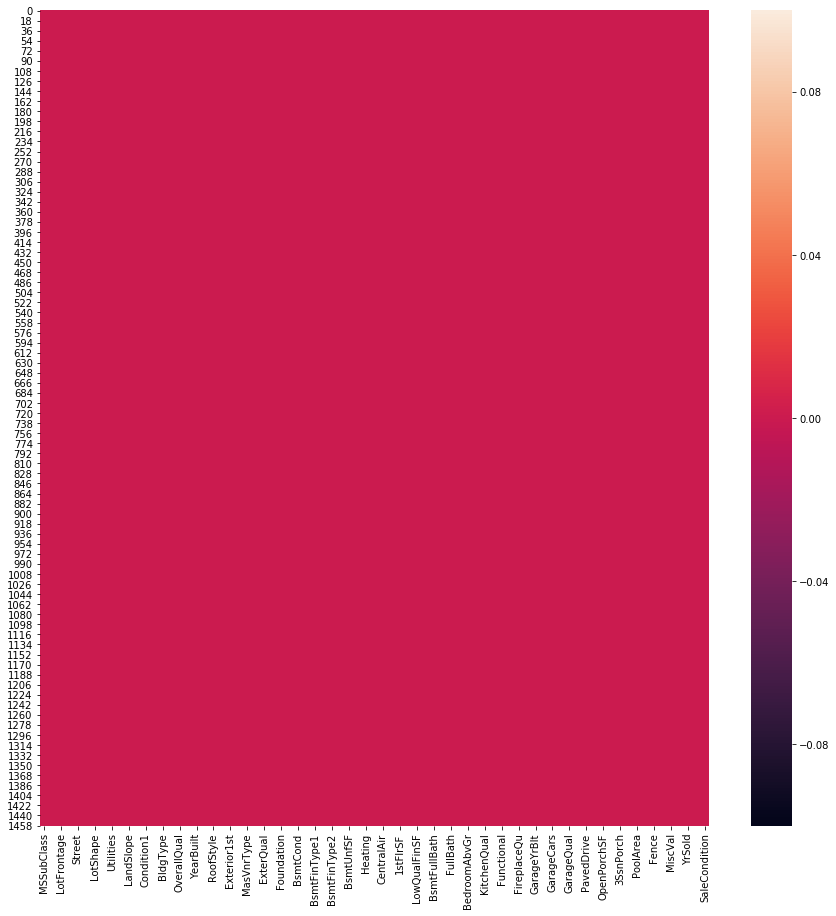

In [47]:
# to see missing value after treatment , we plot figure

plt.figure(figsize = (15,15))
sns.heatmap(dataset.isnull())

can see cleared all white shades from plot

In [48]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [49]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,4.382027,9.360655,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,NoMasonry,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,NoFire,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NoPool,MnPrv,NoMisc,0,6,2010,WD,Normal
1,20,RL,4.394449,9.565704,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NoFire,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NoPool,NoFence,Gar2,12500,6,2010,WD,Normal
2,60,RL,4.304065,9.534595,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,NoMasonry,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NoPool,MnPrv,NoMisc,0,3,2010,WD,Normal
3,60,RL,4.356709,9.208138,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NoPool,NoFence,NoMisc,0,6,2010,WD,Normal
4,120,RL,3.761200,8.518193,Pave,NoAlley,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,NoMasonry,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFire,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NoPool,NoFence,NoMisc,0,1,2010,WD,Normal


# Transforming numerical variables that are really categorical

In [50]:
# converting columns in str which have categorical nature but in int64
# 'YearBuilt', 'YearRemodAdd', 'YrSold','Overallcond', 'OverallQual'
feat_dtype_convert = ['MSSubClass','OverallCond', 'OverallQual']
for i in feat_dtype_convert:
    dataset[i] = dataset[i].astype(str)

In [51]:
# conver in month abbrevation
import calendar
dataset['MoSold'] = dataset['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [52]:
dataset['MoSold'].value_counts()

Jun    250
Jul    212
May    190
Apr    138
Mar    126
Aug    111
Sep     95
Oct     84
Feb     81
Jan     64
Nov     63
Dec     45
Name: MoSold, dtype: int64

In [53]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,4.382027,9.360655,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,NoMasonry,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,NoFire,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NoPool,MnPrv,NoMisc,0,Jun,2010,WD,Normal
1,20,RL,4.394449,9.565704,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NoFire,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NoPool,NoFence,Gar2,12500,Jun,2010,WD,Normal
2,60,RL,4.304065,9.534595,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,NoMasonry,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NoPool,MnPrv,NoMisc,0,Mar,2010,WD,Normal
3,60,RL,4.356709,9.208138,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NoPool,NoFence,NoMisc,0,Jun,2010,WD,Normal
4,120,RL,3.761200,8.518193,Pave,NoAlley,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,NoMasonry,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFire,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NoPool,NoFence,NoMisc,0,Jan,2010,WD,Normal


In [58]:
#import numpy as np
#num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

#for feature in num_features:
 #   dataset[feature]=np.log1p(dataset[feature])

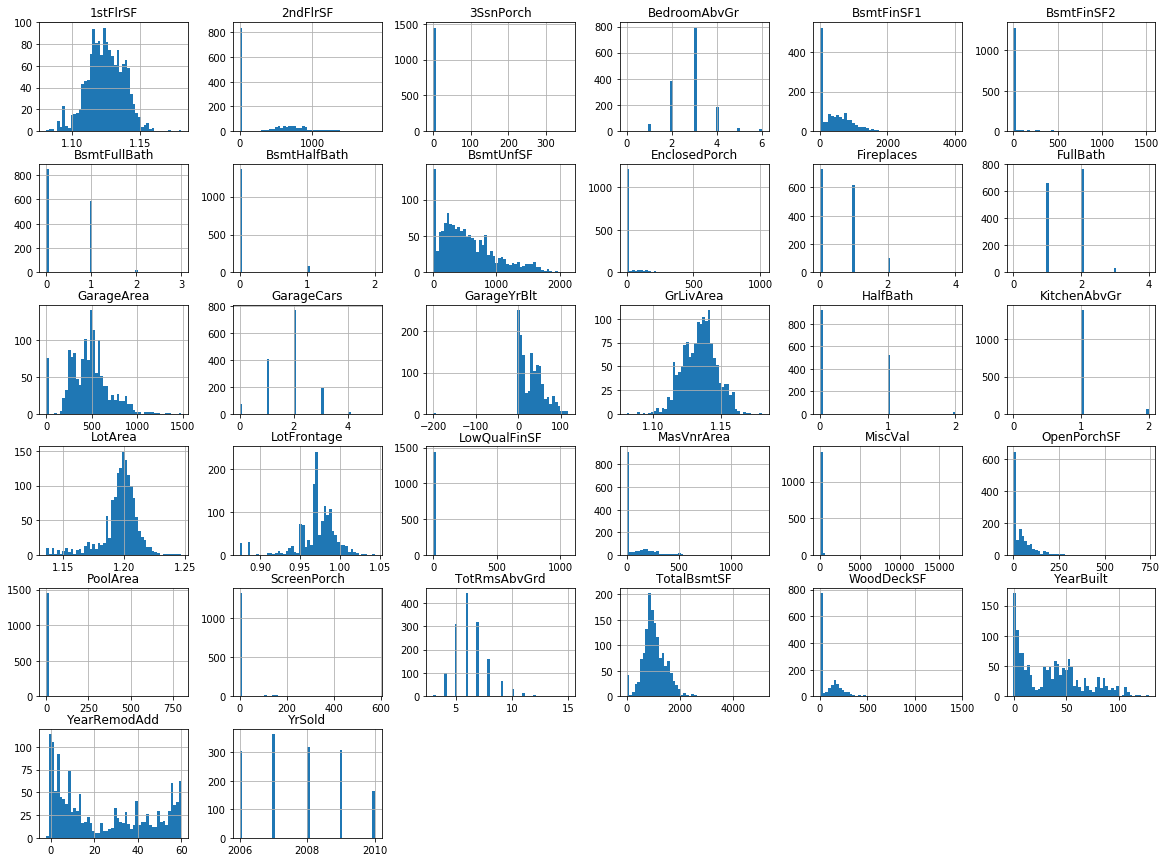

In [59]:
#dataset.hist(bins=50, figsize=(20,15))
#plt.show()

can see skewness has been reduced but no much difference can noticeable 

# Need to perform LabelEncoder for categorical columns as Ordinal categories

In [54]:
from sklearn.preprocessing import LabelEncoder


categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']


for feature in categorical_features:  
    
    lbl = LabelEncoder() 
    
    lbl.fit(list(dataset[feature].values)) 
    
    dataset[feature] = lbl.transform(list(dataset[feature].values))

       
print('Shape dataset: {}'.format(dataset.shape))

Shape dataset: (1459, 79)


In [55]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,4.382027,9.360655,1,1,3,3,0,4,0,12,1,2,0,2,5,5,49,49,1,0,10,12,2,0.0,3,4,1,4,4,3,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,3,5,7,0,3,1,49.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,2,1,0,6,2010,8,4
1,5,4,4.394449,9.565704,1,1,0,3,0,0,0,12,2,2,0,2,6,5,52,52,3,0,11,13,1,108.0,3,4,1,4,4,3,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,3,1,52.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4
2,10,4,4.304065,9.534595,1,1,0,3,0,4,0,8,2,2,0,4,5,4,13,12,1,0,10,12,2,0.0,3,4,2,2,4,3,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,3,6,7,1,5,1,13.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,2,1,0,7,2010,8,4
3,10,4,4.356709,9.208138,1,1,0,3,0,4,0,8,2,2,0,4,6,5,12,12,1,0,10,12,1,20.0,3,4,2,4,4,3,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,7,1,2,1,12.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,4,1,0,6,2010,8,4
4,0,4,3.761200,8.518193,1,1,0,1,0,4,0,22,2,2,4,2,8,4,18,18,1,0,6,6,2,0.0,2,4,2,2,4,3,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,7,0,3,1,18.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,4,1,0,4,2010,8,4


# All Features have different scale hence will perform MinMaxScaler

In [56]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['SalePrice'] ]
len(scaling_feature)


79

# Feature Scaling 

In [57]:
feature_scale=[feature for feature in dataset.columns if feature not in ['SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])


MinMaxScaler()

In [58]:
# transform the train and test set, and add on the Id and SalePrice variables
data =pd.DataFrame(scaler.transform(dataset[feature_scale]), columns = feature_scale)
                

In [59]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.333333,0.6,0.593445,0.566360,1.0,0.5,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.555556,0.625,0.384615,0.822581,0.2,0.0,0.833333,0.857143,0.666667,0.000000,1.000000,1.0,0.2,1.0,1.0,0.75,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.000000,0.166667,1.0,0.00,0.6,0.166667,0.783019,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.5,0.333333,0.000000,0.545455,1.0,1.0,0.8
1,0.333333,0.8,0.598957,0.622527,1.0,0.5,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.666667,0.625,0.407692,0.870968,0.6,0.0,0.916667,0.928571,0.333333,0.083721,1.000000,1.0,0.2,1.0,1.0,0.75,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.666667,0.250000,1.0,0.00,0.6,0.166667,0.792453,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.735294,0.545455,1.0,1.0,0.8
2,0.666667,0.8,0.558854,0.614005,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.555556,0.500,0.107692,0.225806,0.2,0.0,0.833333,0.857143,0.666667,0.000000,1.000000,1.0,0.4,0.5,1.0,0.75,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.000000,0.250000,1.0,0.25,1.0,0.166667,0.669811,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.5,0.333333,0.000000,0.636364,1.0,1.0,0.8
3,0.666667,0.8,0.582212,0.524583,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.666667,0.625,0.100000,0.225806,0.2,0.0,0.833333,0.857143,0.333333,0.015504,1.000000,1.0,0.4,1.0,1.0,0.75,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.666667,0.333333,1.0,0.25,0.4,0.166667,0.666667,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,1.0,0.333333,0.000000,0.545455,1.0,1.0,0.8
4,0.000000,0.8,0.317987,0.335596,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.888889,0.500,0.146154,0.322581,0.2,0.0,0.500000,0.428571,0.666667,0.000000,0.666667,1.0,0.4,0.5,1.0,0.75,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.666667,0.166667,1.0,0.00,0.6,0.166667,0.685535,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,1.0,0.333333,0.000000,0.363636,1.0,1.0,0.8


In [60]:
data.to_csv('X_test.csv',index=False)